Springboard Capstone 02 - Energy Demand prediction based on weather

In [2]:
#Import libraries
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import tz
from pytz import timezone
import missingno as msno

# 1.0 Energy Data Set

## 1.1 Importing data and checking data types 

In [3]:
energy_data = pd.read_csv('raw_data/energy_dataset.csv', parse_dates=['time'])

In [4]:
energy_data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [5]:
energy_data.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation

In [6]:
#Need to use to_datetime to convert time to datetime, and have to set utc=True because there is DST and it won't work otherwise, however, after conversion, the times are now in UTC instead of local time.
energy_data['time'] = pd.to_datetime(energy_data['time'], utc=True)

In [7]:
energy_data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [9]:
#CODE BELOW IS NOT WORKING - WOULD LIKE TO GET TIMES IN LOCAL TIME, NOT UTC
#from_zone = tz.gettz('UTC')
#to_zone = tz.gettz('Europe/Madrid')
spain_tz = timezone('Europe/Madrid')
# Tell the datetime object that it's in UTC time zone since 
# datetime objects are 'naive' by default
#energy_data.time = energy_data.time.replace(tzinfo=from_zone)

# Convert time zone
#energy_data.time = energy_data.time.astimezone(spain_tz)

energy_data.time.replace(tzinfo=spain_tz)

TypeError: NDFrame.replace() got an unexpected keyword argument 'tzinfo'

In [64]:
energy_data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [65]:
#Review summary of data
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35045 non-null  float64            
 2   generation fossil brown coal/lignite         35046 non-null  float64            
 3   generation fossil coal-derived gas           35046 non-null  float64            
 4   generation fossil gas                        35046 non-null  float64            
 5   generation fossil hard coal                  35046 non-null  float64            
 6   generation fossil oil                        35045 non-null  float64            
 7   generation fossil oil shale                  35046 non-null  float64            
 8   generation fossil peat    

In [66]:
#Create y-data profile report
#profile_report = energy_data.profile_report(html={"style": {"full_width": True}})
#profile_report.to_file("Capstone02_ydatareport.html")

In [67]:
energy_data.set_index('time', inplace=True)

## 1.2 Investigating missing values in energy data

In [98]:
#Analyze missing data in energy df
#missing_energy = pd.concat([energy_data.isnull().sum(), 100 * energy_data.isnull().mean()], axis=1)
missing_energy = pd.concat([energy_data.isna().sum(), 100 * energy_data.isna().mean()], axis=1)
missing_energy.columns=['count', '%']
missing_energy.sort_values(by='count', ascending=False)
#Something isn't right here: the table below says there is no mising data in the 'total load actual' column, 
#but later down in the notebook, I am able to retrieve rows that have 'NaN' for 'total load actual'

,count,%
total load actual,36,0.102669
generation biomass,19,0.054187
generation fossil oil,19,0.054187
generation hydro pumped storage consumption,19,0.054187
generation hydro run-of-river and poundage,19,0.054187
generation waste,19,0.054187
generation marine,19,0.054187
generation other renewable,18,0.051335
generation wind onshore,18,0.051335
generation solar,18,0.051335


In [95]:
energy_data[energy_data['total load actual'].isna()]

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-05 11:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3932.0,9258.0,23209.0,NaN,35.50,79.14
2015-01-05 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4236.0,9156.0,23725.0,NaN,36.80,73.95
2015-01-05 13:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4215.0,9072.0,23614.0,NaN,32.50,71.93
2015-01-05 14:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4050.0,8779.0,22381.0,NaN,30.00,71.50
2015-01-05 15:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3728.0,8426.0,21371.0,NaN,30.00,71.85
2015-01-05 16:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3175.0,7946.0,20760.0,NaN,30.60,80.53
2015-01-28 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4136.0,6223.0,36239.0,NaN,65.00,77.62
2015-02-01 06:00:00+00:00,449.0,312.0,4765.0,5269.0,222.0,480.0,980.0,1174.0,0.0,7101.0,...,75.0,48.0,208.0,3289.0,18.0,3141.0,24379.0,NaN,56.10,16.98
2015-02-01 07:00:00+00:00,453.0,312.0,4938.0,5652.0,288.0,0.0,1031.0,3229.0,0.0,7099.0,...,75.0,73.0,207.0,3102.0,63.0,3165.0,27389.0,NaN,57.69,19.56


In [69]:
#Get summary statistics for energy df
energy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
generation biomass,35045.0,383.513540,85.353943,0.00,333.0000,367.00,433.00,592.00
generation fossil brown coal/lignite,35046.0,448.059208,354.568590,0.00,0.0000,509.00,757.00,999.00
generation fossil coal-derived gas,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation fossil gas,35046.0,5622.737488,2201.830478,0.00,4126.0000,4969.00,6429.00,20034.00
generation fossil hard coal,35046.0,4256.065742,1961.601013,0.00,2527.0000,4474.00,5838.75,8359.00
generation fossil oil,35045.0,298.319789,52.520673,0.00,263.0000,300.00,330.00,449.00
generation fossil oil shale,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation fossil peat,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation geothermal,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation hydro pumped storage aggregated,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are two columns without any data: <b>generation hydro pumped storage aggregated</b> and <b>forcast wind offshore eday ahead</b>.
In addition, there are several columns that only have zeros for entries: <ul>
<li>generation fossil coal-derived gas</li>
<li>generation fossil oil shale</li>
<li>generation fossil peat</li>
<li>generation geothermal</li>
<li>generation wind offshore</li>
</ul>
All other columns, except for forcast wind onshore day ahead, total load forecast, total load actual, price day ahead and price actual, have a minimum of 0.0 at some point in the data. 

In [70]:
#Drop columns that have no information
energy_data.drop(columns=['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead', 'generation fossil coal-derived gas', 
                          'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation wind offshore'], axis=1, inplace=True)
energy_data.shape

(35064, 21)

In [78]:
energy_data.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [96]:
#Investigate if total load actual is the sum of the generation columns
mini_df = energy_data.loc['2015-01-01']
#isinstance(mini_df, pd.DataFrame)
col_list= list(mini_df)
del col_list[15:]
col_list
mini_df['calc_total'] = mini_df[col_list].sum(axis=1)
#Is 'total load actual equal to the sum of the generated loads?
mini_df['total load actual'] == mini_df['calc_total']
#Answer: no
#What is the difference?
mini_df['diff'] = mini_df['calc_total'] - mini_df['total load actual'] 
print(mini_df.head())

                           generation biomass  \
time                                            
2015-01-01 00:00:00+00:00               449.0   
2015-01-01 01:00:00+00:00               448.0   
2015-01-01 02:00:00+00:00               438.0   
2015-01-01 03:00:00+00:00               428.0   
2015-01-01 04:00:00+00:00               410.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+00:00                                 328.0   
2015-01-01 01:00:00+00:00                                 323.0   
2015-01-01 02:00:00+00:00                                 254.0   
2015-01-01 03:00:00+00:00                                 187.0   
2015-01-01 04:00:00+00:00                                 178.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+00:0

<Axes: >

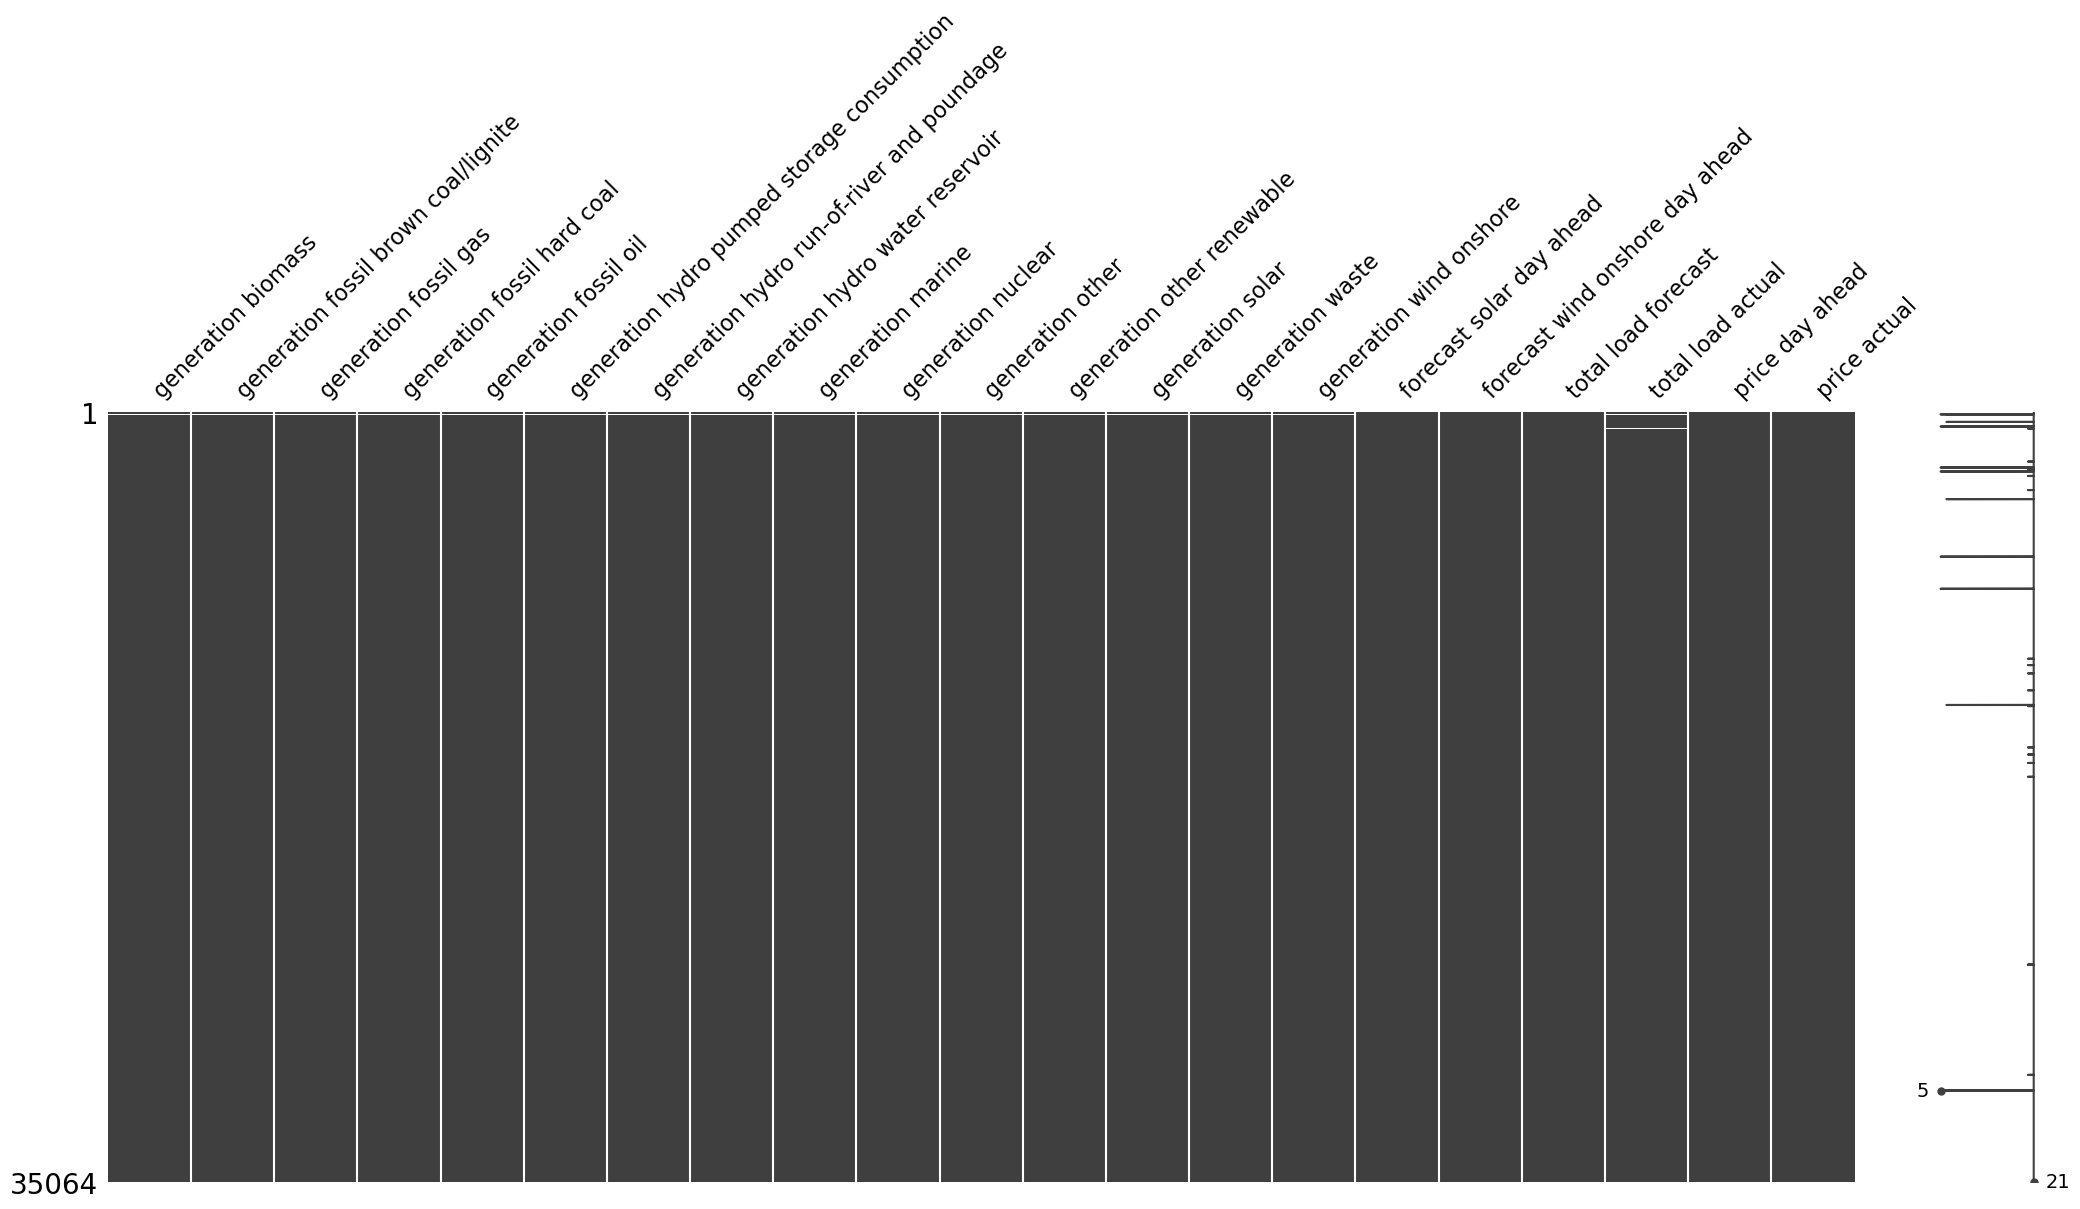

In [49]:
#Plot missing matrix
msno.matrix(energy_data)

Missing data is too small to see.

In [50]:
energy_data[energy_data['generation waste'].isna()]

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-05 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,546.0,8233.0,21912.0,21182.0,35.20,59.68
2015-01-05 11:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3932.0,9258.0,23209.0,NaN,35.50,79.14
2015-01-05 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4236.0,9156.0,23725.0,NaN,36.80,73.95
2015-01-05 13:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4215.0,9072.0,23614.0,NaN,32.50,71.93
2015-01-05 14:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4050.0,8779.0,22381.0,NaN,30.00,71.50
2015-01-05 15:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3728.0,8426.0,21371.0,NaN,30.00,71.85
2015-01-05 16:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3175.0,7946.0,20760.0,NaN,30.60,80.53
2015-01-19 18:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,91.0,6434.0,38642.0,39304.0,70.01,88.95
2015-01-19 19:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28.0,6907.0,38758.0,39262.0,69.00,87.94


In [51]:
#In theory - total load actual should be the sum of 'all' of the generation columns...
#so, once the other values are imputed, then you should be able to calculate that value.
#maybe check to make sure total load actual is the sum of all generation columns.
energy_data[energy_data['total load actual'].isna()]

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-05 11:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3932.0,9258.0,23209.0,NaN,35.50,79.14
2015-01-05 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4236.0,9156.0,23725.0,NaN,36.80,73.95
2015-01-05 13:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4215.0,9072.0,23614.0,NaN,32.50,71.93
2015-01-05 14:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4050.0,8779.0,22381.0,NaN,30.00,71.50
2015-01-05 15:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3728.0,8426.0,21371.0,NaN,30.00,71.85
2015-01-05 16:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3175.0,7946.0,20760.0,NaN,30.60,80.53
2015-01-28 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4136.0,6223.0,36239.0,NaN,65.00,77.62
2015-02-01 06:00:00+00:00,449.0,312.0,4765.0,5269.0,222.0,480.0,980.0,1174.0,0.0,7101.0,...,75.0,48.0,208.0,3289.0,18.0,3141.0,24379.0,NaN,56.10,16.98
2015-02-01 07:00:00+00:00,453.0,312.0,4938.0,5652.0,288.0,0.0,1031.0,3229.0,0.0,7099.0,...,75.0,73.0,207.0,3102.0,63.0,3165.0,27389.0,NaN,57.69,19.56


In [52]:
energy_data.loc['2015-01-05']

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-05 00:00:00+00:00,363.0,104.0,5352.0,3112.0,310.0,938.0,1099.0,2458.0,0.0,4029.0,...,74.0,668.0,153.0,7403.0,588.0,7474.0,23630.0,23390.0,35.50,64.89
2015-01-05 01:00:00+00:00,359.0,0.0,4791.0,2580.0,311.0,1021.0,1076.0,2140.0,0.0,4028.0,...,75.0,662.0,156.0,7887.0,566.0,7731.0,22590.0,21988.0,35.20,60.91
2015-01-05 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,546.0,8233.0,21912.0,21182.0,35.20,59.68
2015-01-05 03:00:00+00:00,334.0,0.0,4390.0,2573.0,308.0,2067.0,982.0,2531.0,0.0,4030.0,...,71.0,570.0,155.0,8348.0,386.0,8397.0,21369.0,20778.0,30.60,58.04
2015-01-05 04:00:00+00:00,338.0,0.0,4108.0,2551.0,300.0,2228.0,969.0,2439.0,0.0,4031.0,...,72.0,428.0,153.0,8526.0,277.0,8437.0,20723.0,20309.0,30.60,59.57
2015-01-05 05:00:00+00:00,341.0,0.0,4396.0,2351.0,291.0,2365.0,967.0,2583.0,0.0,4031.0,...,73.0,243.0,152.0,8518.0,161.0,8660.0,20498.0,20252.0,30.60,69.73
2015-01-05 06:00:00+00:00,343.0,0.0,4227.0,2202.0,301.0,2321.0,1087.0,2740.0,0.0,4031.0,...,74.0,155.0,143.0,8263.0,195.0,8285.0,19736.0,19964.0,30.00,72.97
2015-01-05 07:00:00+00:00,345.0,0.0,4017.0,2138.0,317.0,2071.0,1110.0,2480.0,0.0,4030.0,...,74.0,500.0,143.0,8326.0,685.0,8286.0,19970.0,20796.0,30.60,77.92
2015-01-05 08:00:00+00:00,369.0,0.0,4243.0,2239.0,331.0,1465.0,1168.0,2575.0,0.0,4028.0,...,76.0,1333.0,140.0,8046.0,1669.0,8122.0,21590.0,22478.0,35.30,79.59


In [53]:
#Imputing linearly will result in floating point decimals, and it appears that the data is in whole numbers. Maybe fillna instead?
#energy_data.interpolate(method='linear', inplace=True)
#this will fill all columns, but we want to hold total load actual back...
energy_data_fill = energy_data.fillna(method='ffill')
energy_data_fill.loc['2015-01-05']

C:\Users\keral\AppData\Local\Temp\ipykernel_7108\2191950509.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  energy_data_fill = energy_data.fillna(method='ffill')


,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-05 00:00:00+00:00,363.0,104.0,5352.0,3112.0,310.0,938.0,1099.0,2458.0,0.0,4029.0,...,74.0,668.0,153.0,7403.0,588.0,7474.0,23630.0,23390.0,35.50,64.89
2015-01-05 01:00:00+00:00,359.0,0.0,4791.0,2580.0,311.0,1021.0,1076.0,2140.0,0.0,4028.0,...,75.0,662.0,156.0,7887.0,566.0,7731.0,22590.0,21988.0,35.20,60.91
2015-01-05 02:00:00+00:00,359.0,0.0,4791.0,2580.0,311.0,1021.0,1076.0,2140.0,0.0,4028.0,...,75.0,662.0,156.0,7887.0,546.0,8233.0,21912.0,21182.0,35.20,59.68
2015-01-05 03:00:00+00:00,334.0,0.0,4390.0,2573.0,308.0,2067.0,982.0,2531.0,0.0,4030.0,...,71.0,570.0,155.0,8348.0,386.0,8397.0,21369.0,20778.0,30.60,58.04
2015-01-05 04:00:00+00:00,338.0,0.0,4108.0,2551.0,300.0,2228.0,969.0,2439.0,0.0,4031.0,...,72.0,428.0,153.0,8526.0,277.0,8437.0,20723.0,20309.0,30.60,59.57
2015-01-05 05:00:00+00:00,341.0,0.0,4396.0,2351.0,291.0,2365.0,967.0,2583.0,0.0,4031.0,...,73.0,243.0,152.0,8518.0,161.0,8660.0,20498.0,20252.0,30.60,69.73
2015-01-05 06:00:00+00:00,343.0,0.0,4227.0,2202.0,301.0,2321.0,1087.0,2740.0,0.0,4031.0,...,74.0,155.0,143.0,8263.0,195.0,8285.0,19736.0,19964.0,30.00,72.97
2015-01-05 07:00:00+00:00,345.0,0.0,4017.0,2138.0,317.0,2071.0,1110.0,2480.0,0.0,4030.0,...,74.0,500.0,143.0,8326.0,685.0,8286.0,19970.0,20796.0,30.60,77.92
2015-01-05 08:00:00+00:00,369.0,0.0,4243.0,2239.0,331.0,1465.0,1168.0,2575.0,0.0,4028.0,...,76.0,1333.0,140.0,8046.0,1669.0,8122.0,21590.0,22478.0,35.30,79.59


In [ ]:
#Check that 

# Weather Data Set

In [99]:
#Load the weather data
weather_data = pd.read_csv('raw_data/weather_features.csv', parse_dates=['dt_iso'])

In [100]:
weather_data['dt_iso'] = pd.to_datetime(weather_data['dt_iso'], utc=True)

In [101]:
#Review summary of data
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   dt_iso               178396 non-null  datetime64[ns, UTC]
 1   city_name            178396 non-null  object             
 2   temp                 178396 non-null  float64            
 3   temp_min             178396 non-null  float64            
 4   temp_max             178396 non-null  float64            
 5   pressure             178396 non-null  int64              
 6   humidity             178396 non-null  int64              
 7   wind_speed           178396 non-null  int64              
 8   wind_deg             178396 non-null  int64              
 9   rain_1h              178396 non-null  float64            
 10  rain_3h              178396 non-null  float64            
 11  snow_3h              178396 non-null  float64            
 12  cl

In [102]:
#Print head of df
weather_data.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 01:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 02:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 03:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [103]:
#How many unique cities are included in the data set?
cities = weather_data['city_name'].unique()
print(cities)

['Valencia' 'Madrid' 'Bilbao' ' Barcelona' 'Seville']


In [ ]:
#Create ydata report for weather data
#profile_report = weather_data.profile_report(html={"style": {"full_width": True}})
#profile_report.to_file("Capstone02_weather_ydatareport.html")

In [104]:
#Since both data sets have the same start and end dates, and the data is hourly, they should have the same number of rows, but let's check.
energy_data.shape[0] == weather_data.shape[0]

False

In [105]:
#Since they are not the same length, what is the relationship between the two?
ratio = weather_data.shape[0]/energy_data.shape[0]
print(ratio)

5.087725302304357


There are over five times the number of rows in the weather data set than are in the energy data set.

In [107]:
#Set index
weather_data.set_index('dt_iso', inplace=True)

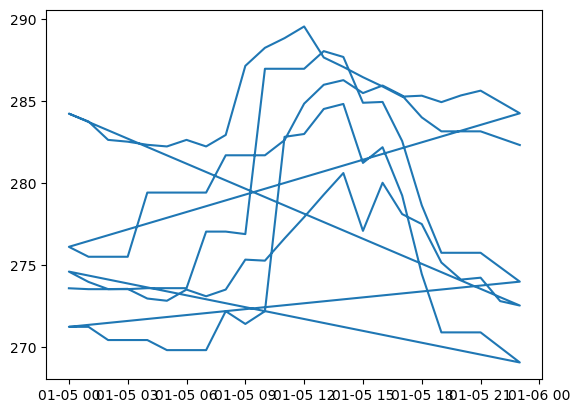

In [116]:
#Examine a particular day
wd_day = weather_data.loc['2015-01-05']
plt.plot(wd_day.index, wd_day['temp_min'])
plt.show()

There are five times the weather data because there is a data point for each of the five cities.

In [ ]:
#Maybe graph the dates to get more info?
#_ = plt.hist(energy_data.time)
#plt.show()
#The above was not helpful
#Maybe determine the frequency of each df?
weather_data = weather_data.set_index('dt_iso')
weather_data.head()
wd_index = weather_data.index
wd_freq = weather_data.index.freq
print(wd_freq)
#FREQ RETURNS "NONE". NOT SURE WHY. CAN YOU FORCE A FREQ ON TO A DF?

In [ ]:
#Looking at the first few rows of the weather df, it looks like temp, temp_min and temp_max are all equal. How to test for this throughout the df?
#Check if they are not all equal > return True only if all unequal
weather_data["temp_eq"] = weather_data.apply(lambda x: x.temp != x.temp_min != x.temp_max, axis = 1)
weather_data['temp_eq'].sum()
#create a df of just the rows where temp != temp_min != temp_max
temp_not_eq = weather_data[weather_data['temp_eq'] == True][['dt_iso', 'temp', 'temp_min', 'temp_max', 'temp_eq']]
#Test to see relationship of temp to temp_min and temp_max
temp_not_eq['avg'] = (temp_not_eq['temp_max'] + temp_not_eq['temp_min'])/2
temp_not_eq.head()

It appears "temp" is close to the average of the temp_min and temp_max, but not exactly. It is not clear what that value is. 

In [106]:
#Analyze missing data in weather df
missing_weather = pd.concat([weather_data.isnull().sum(), 100 * weather_data.isnull().mean()], axis=1)
missing_weather.columns=['count', '%']
missing_weather.sort_values(by='count', ascending=False)

,count,%
dt_iso,0,0.0
rain_1h,0,0.0
weather_description,0,0.0
weather_main,0,0.0
weather_id,0,0.0
clouds_all,0,0.0
snow_3h,0,0.0
rain_3h,0,0.0
wind_deg,0,0.0
city_name,0,0.0
